In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint
import time
print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\asdfgh\\Desktop\\pandass\\processed_data.csv")
df
# Explore the dataset
print(df.shape)  # To check the number of rows and columns
print(df.info())  # To check data types and missing values
print(df.describe())  # Summary statistics for numerical columns
print(df.head())  # Display first 5 rows
print(df.tail())  # Display last 5 rows

(43800, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB
None
       Temperature (°C)  Vibration (mm/s)  Pressure (Pa)           RPM  \
count      43800.000000      43800.000000   43800.000000  43800.000000   
mean           0.497752          0.500139       0.502902      0.500764   
std            0.289543          0.288612       0.289589      0.288880   
min     

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum == 0:
   print("there are no missing value in the dataset")

# Drop rows with missing values (if needed)
df = df.dropna()

# Or use the mean to fill numeric columns
df_clean = df.fillna(df.mean())

# Ensure all columns are numeric
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Recheck for any remaining NaN values
print(df_clean.isnull().sum())

Timestamp                   0
Temperature (°C)            0
Vibration (mm/s)            0
Pressure (Pa)               0
RPM                         0
Maintenance Required    43800
Temp_Change                 0
Vib_Change                  0
dtype: int64
Timestamp               0
Temperature (°C)        0
Vibration (mm/s)        0
Pressure (Pa)           0
RPM                     0
Maintenance Required    0
Temp_Change             0
Vib_Change              0
dtype: int64


In [31]:
# First, check data types of all columns
print(df.dtypes)

# Convert 'Maintenance Required' to numeric (e.g., 'Yes' = 1, 'No' = 0)
df['Maintenance Required'] = df['Maintenance Required'].map({'Yes': 1, 'No': 0})

# Compute the mean for each numeric column
mean_values = df.mean()
print(mean_values)

Pressure                float64
RPM                     float64
Temperature             float64
Maintenance Required      int64
dtype: object
Pressure                 130.0
RPM                     4100.0
Temperature               31.0
Maintenance Required       NaN
dtype: float64


Pressure                 130.00
RPM                     4100.00
Temperature               31.00
Maintenance Required       0.75
dtype: float64


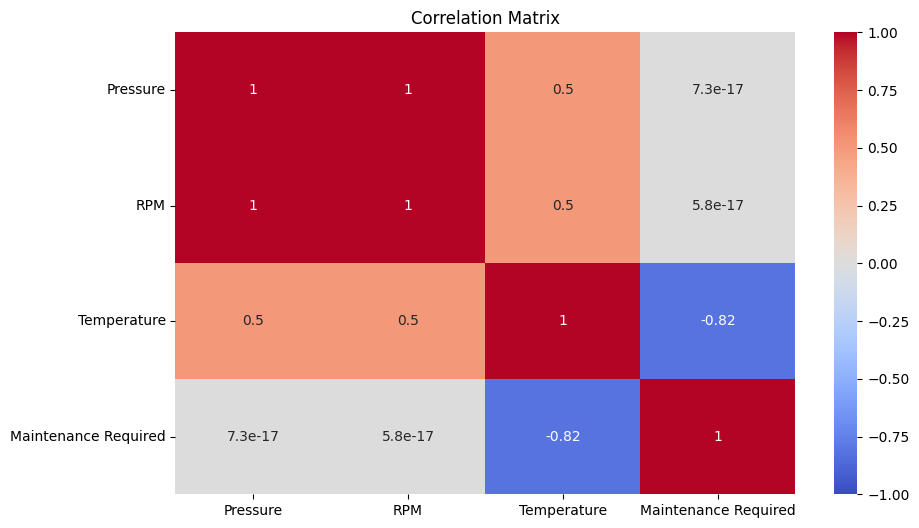

In [30]:
# Sample DataFrame
data = {
    'Pressure': [120, 130, 140, None],
    'RPM': [4000, None, 4200, 4100],
    'Temperature': [30, 32, None, 31],
    'Maintenance Required': [1, 0, 1, 1]  # Categorical column
}

df = pd.DataFrame(data)

# Compute the mean for each numeric column
mean_values = df.mean()
print(mean_values)

# Compute the correlation matrix
df_clean = df.fillna(mean_values)
correlation_matrix = df_clean.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Split the data into features and target
X = df_clean.drop('Maintenance Required', axis=1)
y = df_clean['Maintenance Required']
print(X)
print(y)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'])

Empty DataFrame
Columns: [Timestamp, Temperature (°C), Vibration (mm/s), Pressure (Pa), RPM, Temp_Change, Vib_Change]
Index: []
Series([], Name: Maintenance Required, dtype: float64)
Series([], Name: Timestamp, dtype: datetime64[ns])


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\asdfgh\\Desktop\\pandass\\processed_data.csv")
# Assuming you have your features (X) and target variable (y) defined
X = df[["Temperature (°C)", "Vibration (mm/s)", "Pressure (Pa)", "RPM", "Temp_Change", "Vib_Change"]]
y = df['Maintenance Required']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Standardize the features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (35040, 6)
X_test shape: (8760, 6)
y_train shape: (35040,)
y_test shape: (8760,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Display classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      4356
           1       0.51      0.50      0.50      4404

    accuracy                           0.51      8760
   macro avg       0.51      0.51      0.51      8760
weighted avg       0.51      0.51      0.51      8760

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      4356
           1       0.50      0.51      0.51      4404

    accuracy                           0.50      8760
   macro avg       0.50      0.50      0.50      8760
weighted avg       0.50      0.50      0.50      8760



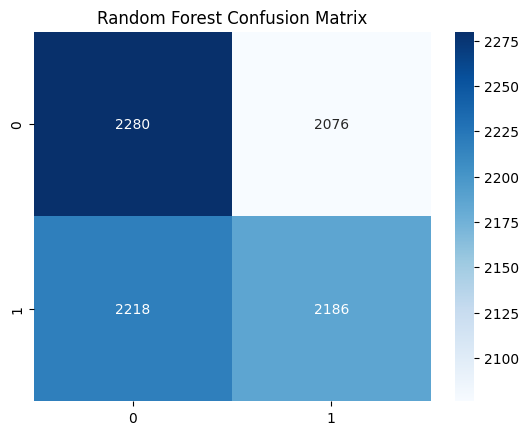

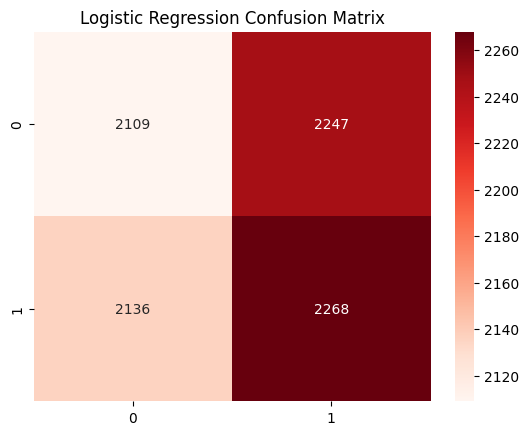

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [15]:
import numpy as np

# Simulate real-time data (replace with actual streaming data in real-world applications)
real_time_data = pd.DataFrame({
    'Pressure': np.random.uniform(20000, 45000, 50),
    'RPM': np.random.uniform(10000, 44000, 50),
    'Temperature': np.random.uniform(30, 100, 50),
    'Vibration': np.random.uniform(1, 10, 50)
})

# Define thresholds for alerts
pressure_threshold = 40000
vibration_threshold = 8

# Check if any real-time data breaches thresholds
alerts = real_time_data[(real_time_data['Pressure'] > pressure_threshold) | (real_time_data['Vibration'] > vibration_threshold)]
print("ALERT! The following readings exceed safe thresholds:")
print(alerts)

ALERT! The following readings exceed safe thresholds:
        Pressure           RPM  Temperature  Vibration
0   43199.981245  38675.686061    38.011517   7.760698
1   27671.261546  38317.944075    97.814688   8.278297
2   33323.252768  40158.192625    89.264709   8.717453
3   41512.084336  33548.737759    98.060097   9.269813
6   36396.802112  18566.316553    72.919123   8.378621
9   40972.033056  37919.633395    66.668683   4.967756
10  32971.790406  16608.772228    72.457132   8.168194
12  43929.886055  13178.733153    85.022374   3.604029
15  22026.126543  15180.852092    60.793072   9.312662
17  44719.303087  42864.137567    66.580599   4.011213
22  42551.482228  34088.580115    57.982254   5.388063
26  26688.279012  25129.600986    91.285719   9.565907
27  24244.672676  10853.122838    53.987419   8.634514
28  42324.733900  29365.283528    71.634109   6.019191
31  30719.688931  34575.051714    42.123672   8.545879
33  40227.942500  17808.362029    87.323974   3.688630
34  41305.9

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

# Logistic Regression evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1 Score: {f1_lr}")

Random Forest - Accuracy: 0.5098173515981735, Precision: 0.5129047395588925, Recall: 0.4963669391462307, F1 Score: 0.5045003461804755
Logistic Regression - Accuracy: 0.49965753424657533, Precision: 0.5023255813953489, Recall: 0.5149863760217984, F1 Score: 0.508577194752775


In [17]:
# Define hypothetical costs
cost_of_predictive_maintenance = 500  # Example cost
cost_of_preventive_maintenance = 1000  # Example cost

# Total maintenance cases from your data
total_maintenance_cases = sum(y_test)

# Calculate savings
savings = (cost_of_preventive_maintenance - cost_of_predictive_maintenance) * total_maintenance_cases
print(f"Cost Savings from Predictive Maintenance: ${savings}")

Cost Savings from Predictive Maintenance: $2202000
